In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [7]:
bs = boston['data']
bs

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
target = boston['target']

In [6]:
feature = boston['feature_names']
feature

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
df = pd.DataFrame(bs,columns=feature)

In [9]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [9]:
y = pd.DataFrame(target,columns=['SalePrice'])

In [10]:
df.shape,y.shape

((506, 13), (506, 1))

### EDA & FEATURE ENGINEERING

* 1.Making Description of the features

In [11]:
dict= {'CRIM':['per capita crime rate by town'],
       'ZN':['proportion of residential land over 25,000 sq.ft.'],
       'INDUS':['proportion of non-retail business acres per town'],
       'CHAS':['Charles River dummy variable'],
       'NOX':['nitric oxides concentration per 10 million'],
       'RM':['average number of rooms per dwelling'],
       'AGE':['proportion of owner-occupied prior to 1940'],
       'DIS':['distances to five Boston employment centres'],
       'RAD':['index of accessibility to radial highways'],
       'TAX':['full-value property-tax rate per $10,000'],
       'PTRATIO':['pupil-teacher ratio by town'],
       'B':['1000(Bk - 0.63)^2,Bk is the proportion of blacks'],
       'LSTAT':['% lower status of the population']}

In [12]:
des = pd.DataFrame(dict,index=['Description'])

In [13]:
print('\nDescription of the features:')
des.T


Description of the features:


Description
CRIM                         per capita crime rate by town
ZN       proportion of residential land over 25,000 sq.ft.
INDUS     proportion of non-retail business acres per town
CHAS                          Charles River dummy variable
NOX             nitric oxides concentration per 10 million
RM                    average number of rooms per dwelling
AGE             proportion of owner-occupied prior to 1940
DIS            distances to five Boston employment centres
RAD              index of accessibility to radial highways
TAX               full-value property-tax rate per $10,000
PTRATIO                        pupil-teacher ratio by town
B         1000(Bk - 0.63)^2,Bk is the proportion of blacks
LSTAT                     % lower status of the population

In [93]:
df.CHAS.unique()

array([0., 1.])

In [94]:
print(f"If Bound by Charles River = {df.CHAS.unique()[1]}, Otherwise = {df.CHAS.unique()[0]}")

If Bound by Charles River = 1.0, Otherwise = 0.0


In [95]:
df.RAD.unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])


Count-Plots of two Categorical Datasets:


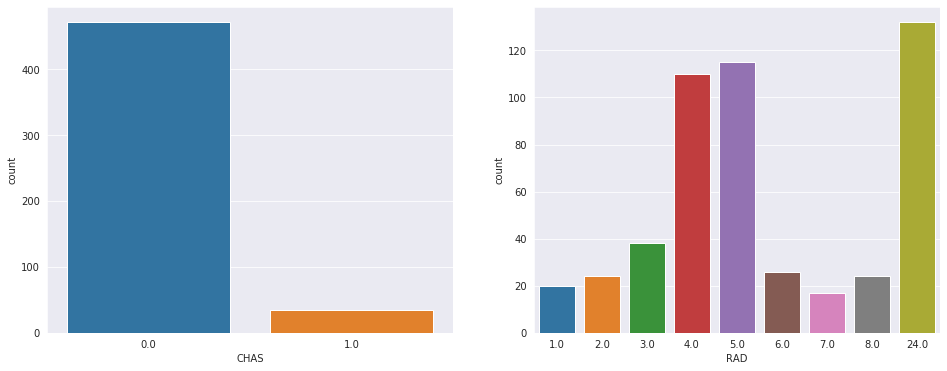

In [96]:
print('\nCount-Plots of two Categorical Datasets:')
f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
sns.countplot(df.CHAS,ax=ax1)
sns.countplot(df.RAD,ax=ax2)
plt.show()

In [97]:
data = pd.concat([y,df],1).copy()

In [98]:
data.head(2)

SalePrice     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0       24.0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1       21.6  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   

     TAX  PTRATIO      B  LSTAT  
0  296.0     15.3  396.9   4.98  
1  242.0     17.8  396.9   9.14

#### Pearson corelation of the data sets

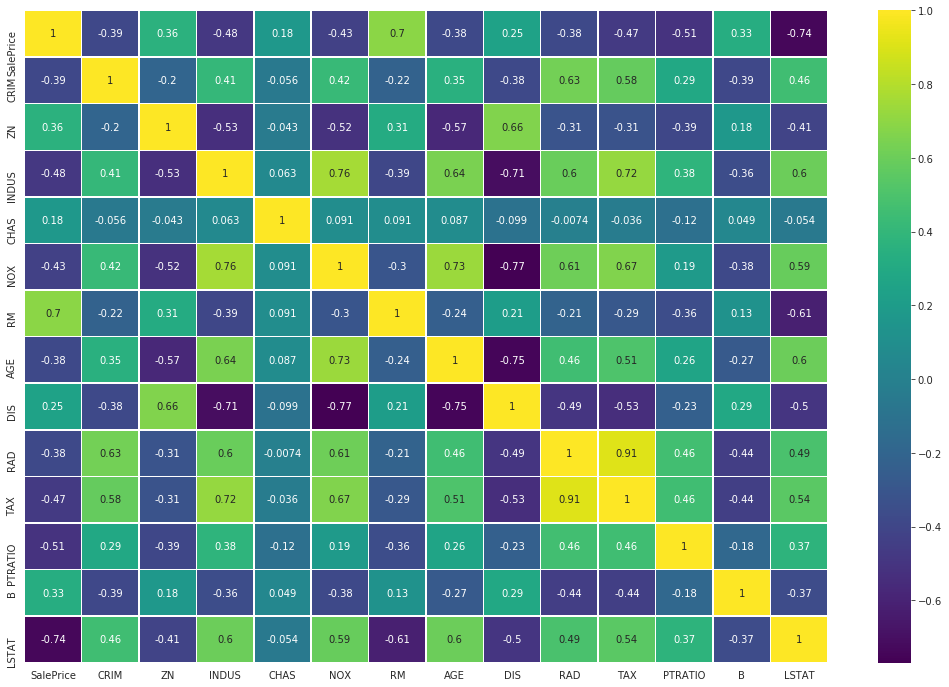

In [99]:
corr = data.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,annot=True,fmt='.2g',linewidths=0.5,cmap='viridis')
plt.show()

In [100]:
imp = corr[['SalePrice']]
imp = imp.sort_values(by='SalePrice',ascending=False)


   Feature Importancee:


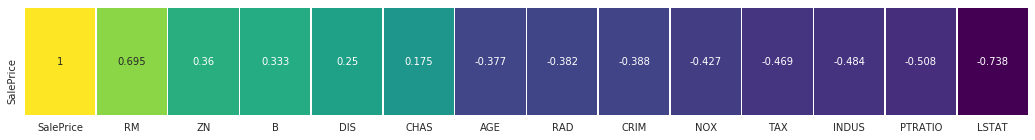

In [101]:
print("\n   Feature Importancee:")
plt.figure(figsize=(18,2))
sns.heatmap(imp.T,annot=True,fmt='.3g',linewidths=0.5,cbar=False,cmap='viridis')
plt.show()

#### Making Scatter-Plot, Box-Plot  &  Distribution-plot Simultaneously for comparison

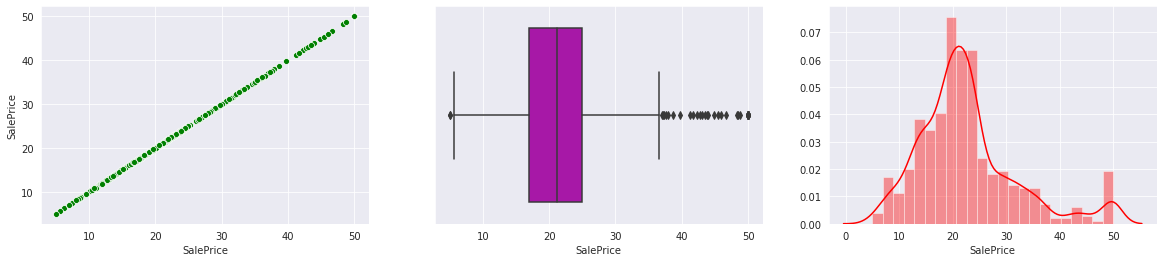

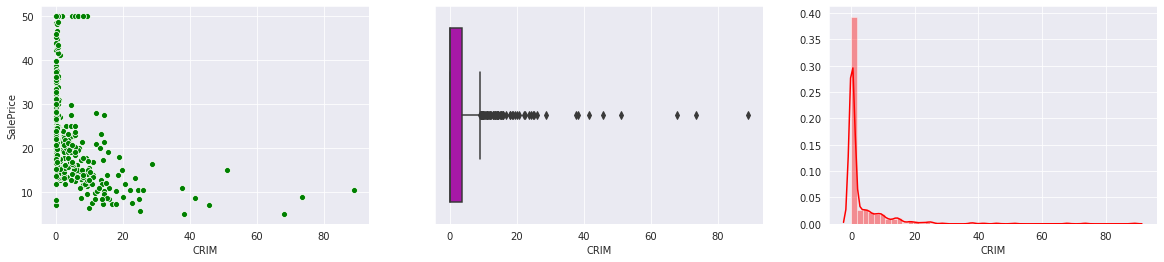

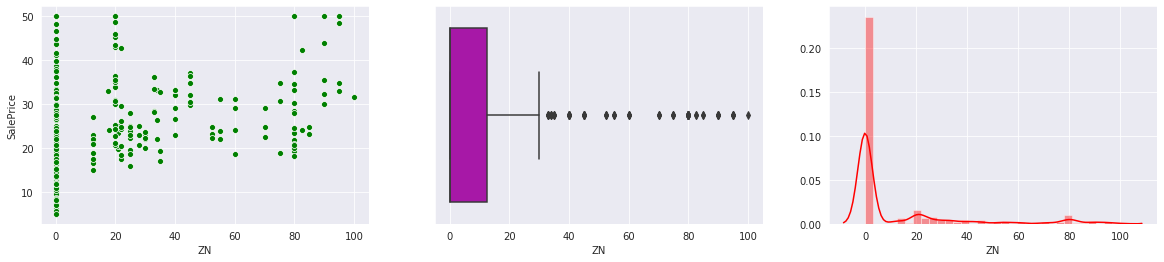

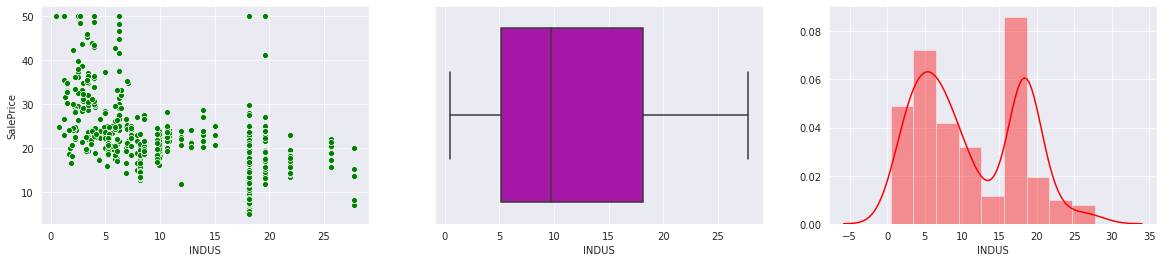

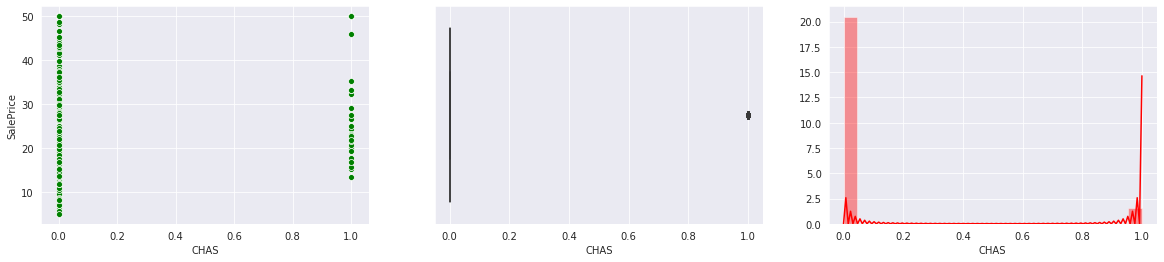

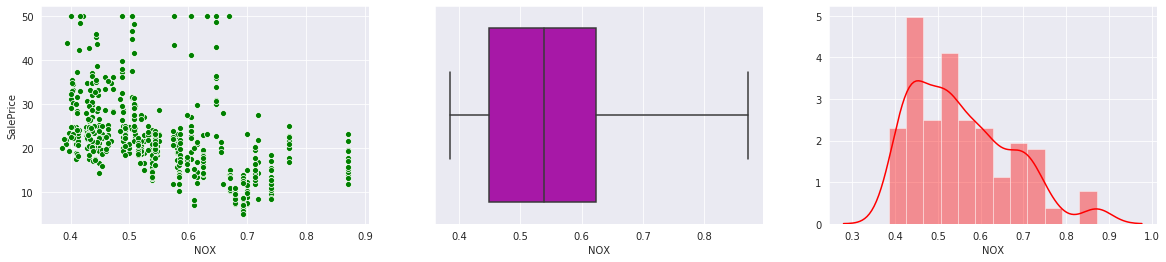

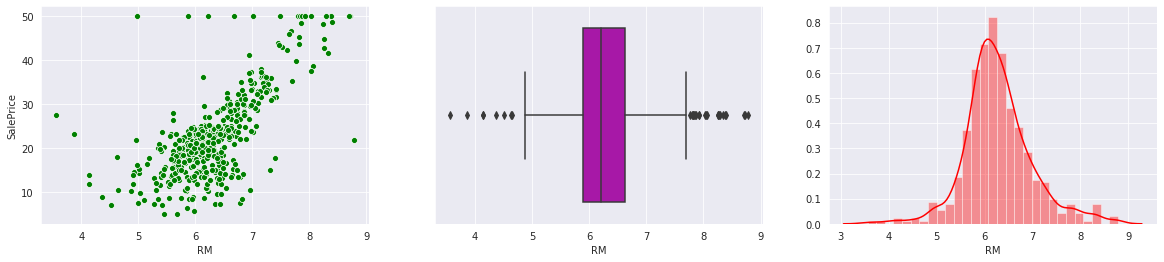

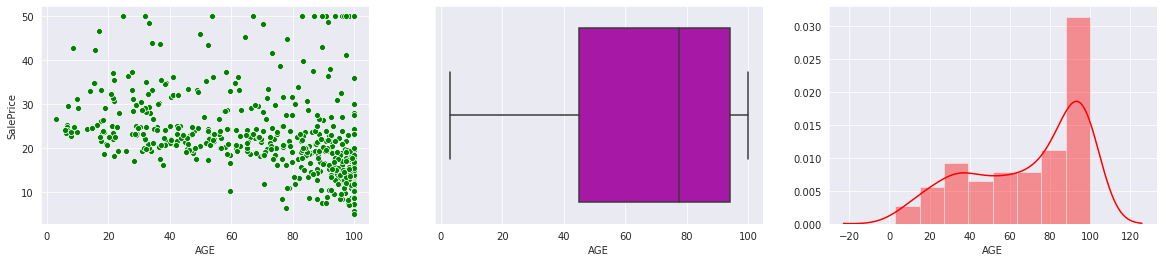

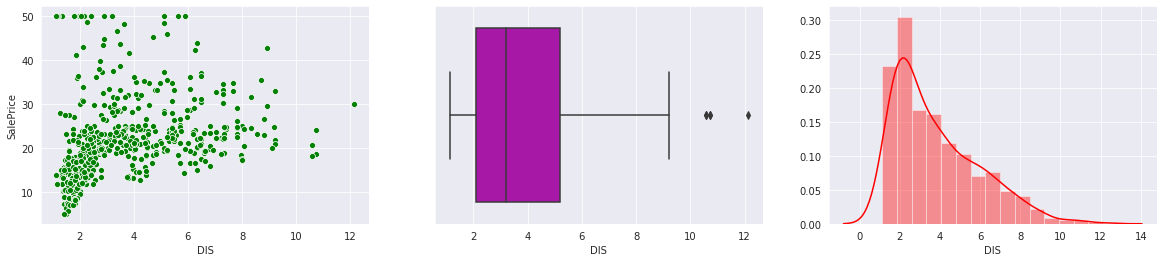

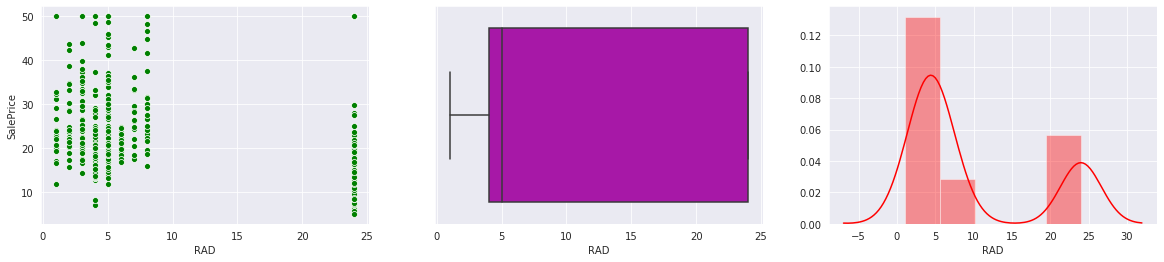

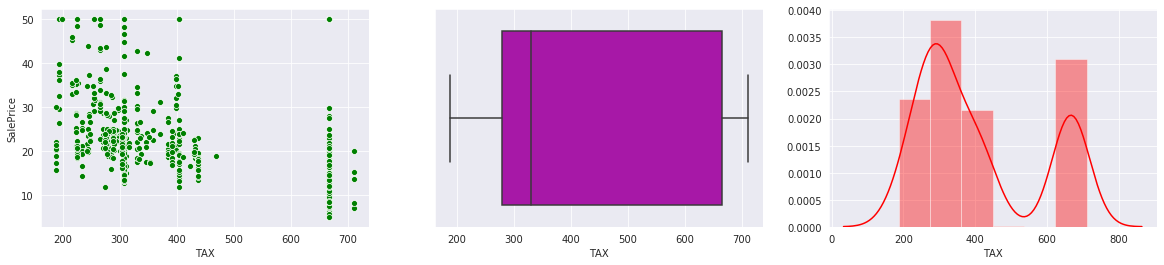

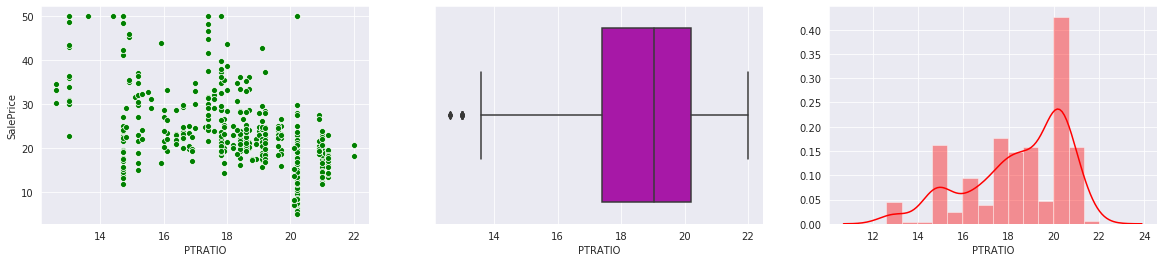

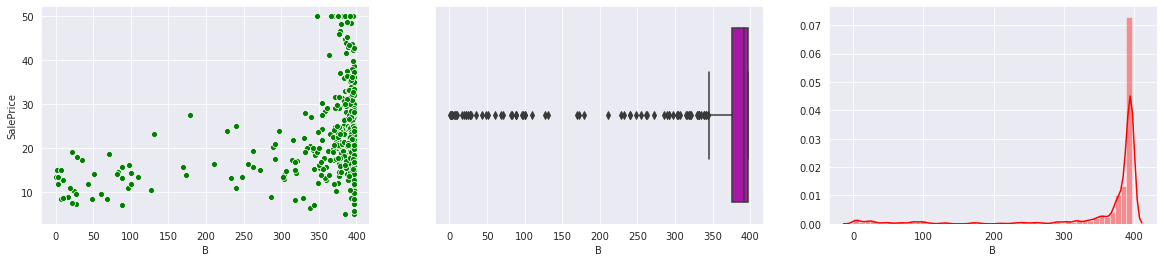

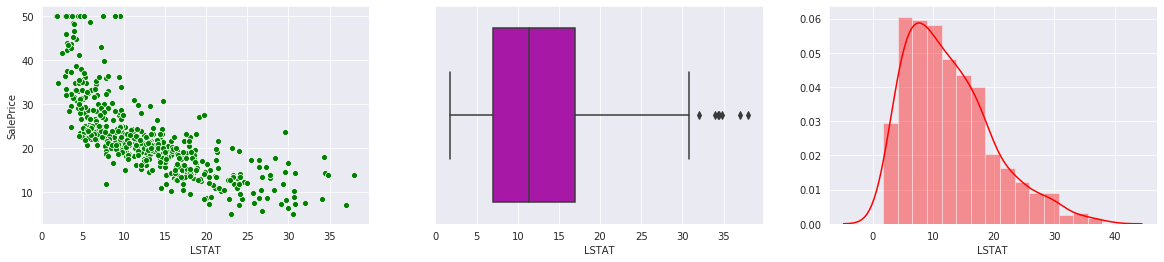

In [102]:
for i in range(len(data.columns)):
    a = data[data.columns[i]]
    b = data['SalePrice']
    f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,4))
    sns.scatterplot(a,b,ax=ax1,color='g')
    sns.boxplot(a,ax=ax2,color='m')
    sns.distplot(a,ax=ax3,color='r')

In [103]:
col = ['SalePrice','RM','AGE','LSTAT']

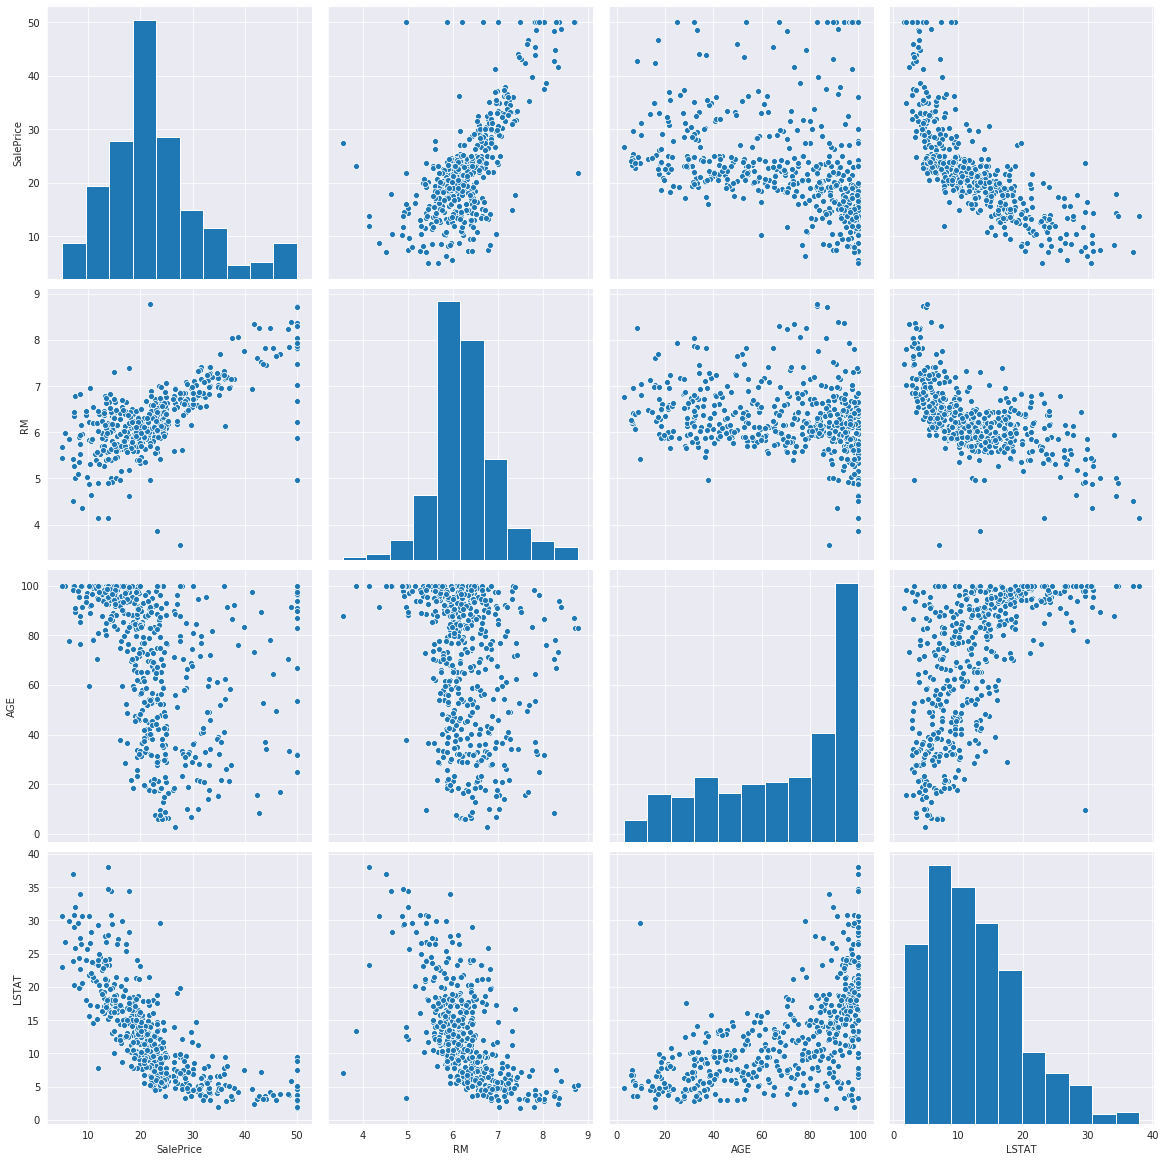

In [104]:
sns.pairplot(data[col],height=4)
plt.show()

* we can clearly found that there are some outliers

### removing some outliers with Z-score transformation method

For cleaning I took Target data

In [105]:
def Z_score(data,left,right):
    index= []
    mean = data.mean()
    std = data.std()
    for i in range(len(data)):
        z = (data[i]-mean)/std
        if (z >= -left) and (z <= right):
            index.append(i)
        else:
            pass
    return index 

In [106]:
clean_index = Z_score(y.SalePrice,2.5,2.4)
print("Data to be cleaned:{}".format(len(y) - len(clean_index)))

Data to be cleaned:23


In [107]:
len(clean_index)

483

* Cleaning Data sets

In [108]:
Df = data.iloc[clean_index].reset_index(drop=True).copy()
Df.shape

(483, 14)

* Data Cleaned

In [109]:
Df.head(2)

SalePrice     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0       24.0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1       21.6  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   

     TAX  PTRATIO      B  LSTAT  
0  296.0     15.3  396.9   4.98  
1  242.0     17.8  396.9   9.14

In [110]:
del y,df,data

#### Seperating X-data and Y-data

In [111]:
y = Df['SalePrice'].copy()

In [112]:
X = Df.drop(['SalePrice'],1).copy()

In [113]:
del Df

In [114]:
X.shape,y.shape

((483, 13), (483,))

#### Feature selection With LASSO transformation

In [115]:
from sklearn.linear_model import Lasso

In [116]:
lasso = Lasso(alpha=0.50,max_iter=2000)
lasso.fit(X,y)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=2000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [117]:
coeff_values = pd.DataFrame({'coeff':lasso.coef_},index=X.columns).sort_values(by='coeff')
c = (abs(coeff_values.coeff) == 0)
col_non_imp = list(X.columns[c])
len(col_non_imp)

2

In [118]:
col_non_imp

['DIS', 'RAD']

In [119]:
X.drop(col_non_imp,1,inplace=True)

In [120]:
y = pd.DataFrame(y)
y.shape

(483, 1)

#### *Two non-important-features( 'DIS'  &  'RAD') are removed

* Making log transformation of the features, Except 'CHAS'

In [121]:
feat = [col for col in X.columns if col != 'CHAS']

In [122]:
feat

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [123]:
for col in feat:
    X[col] = X[col].replace({0:1})

** Replacing Zero by-> One, otherwise logarithm will give error ,for that reason I did not taken 'CHAS'

In [124]:
for col in feat:
    X[col] = X[col].apply(lambda x : np.log(x))

In [125]:
X.shape

(483, 11)

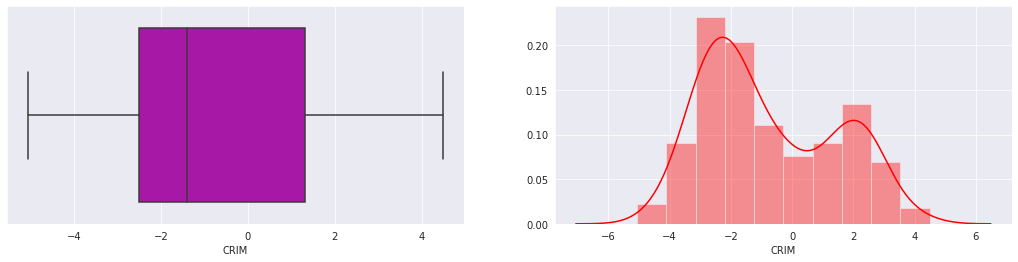

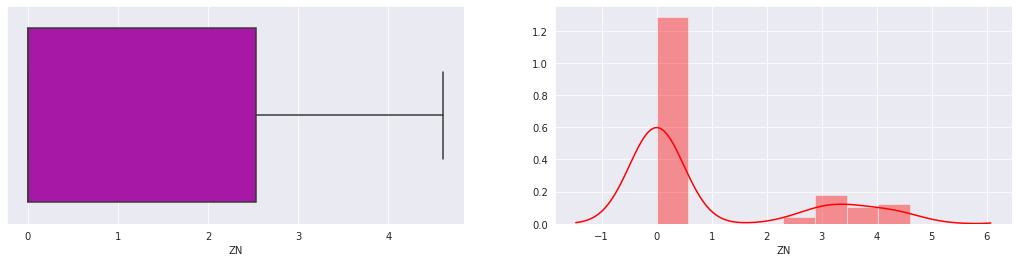

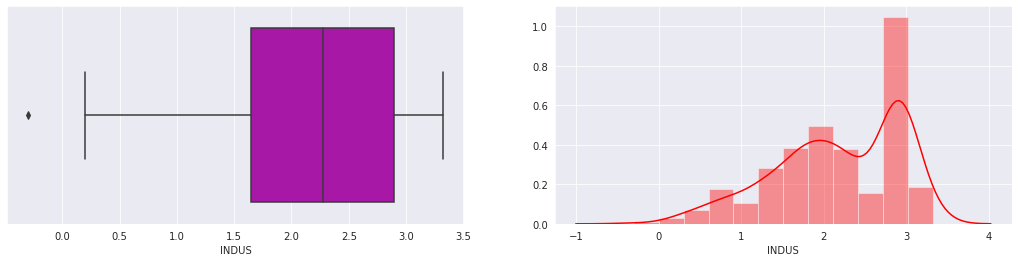

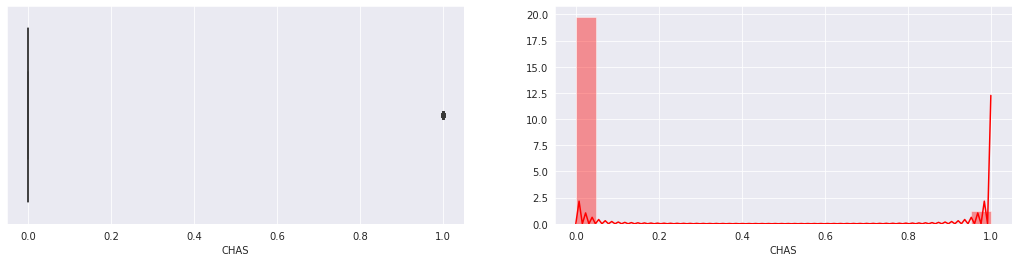

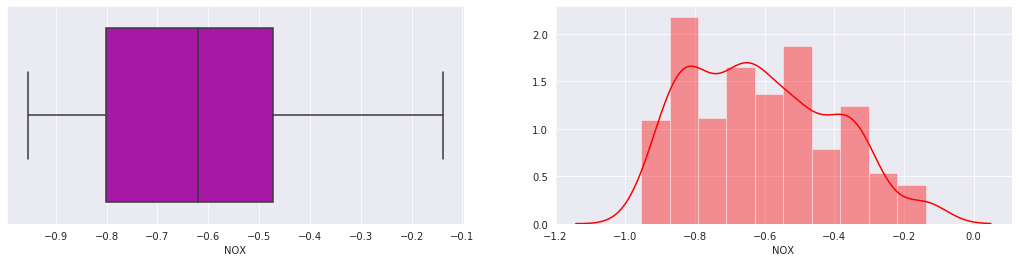

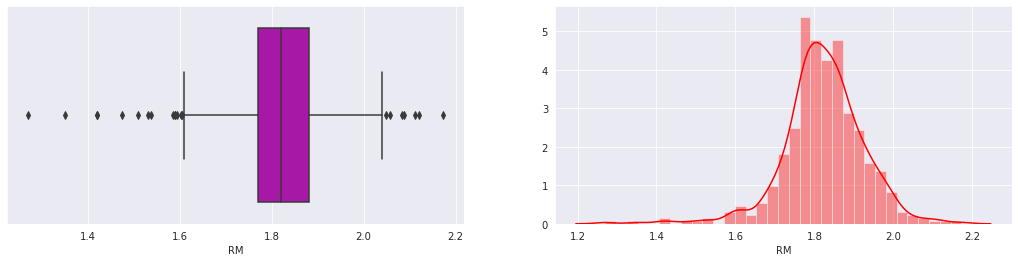

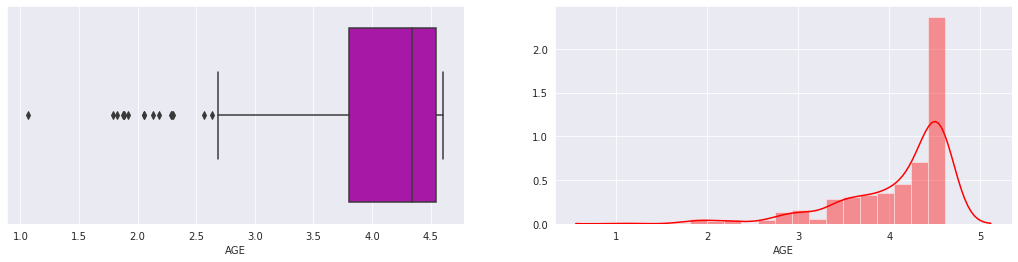

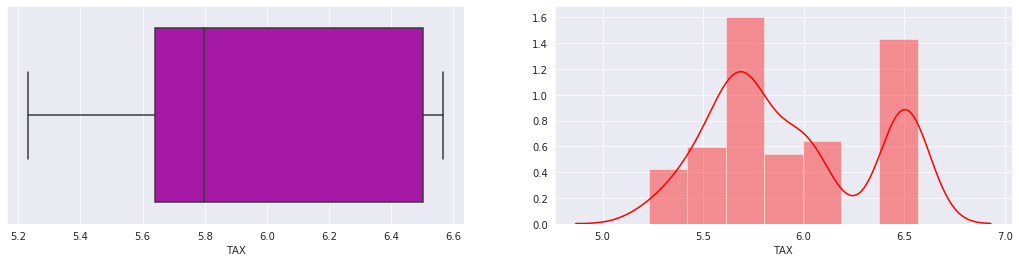

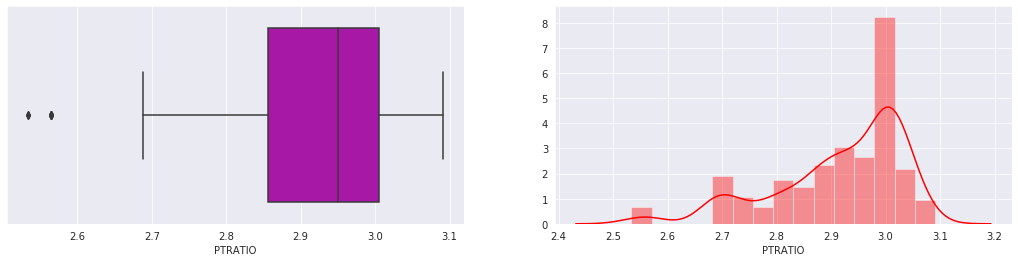

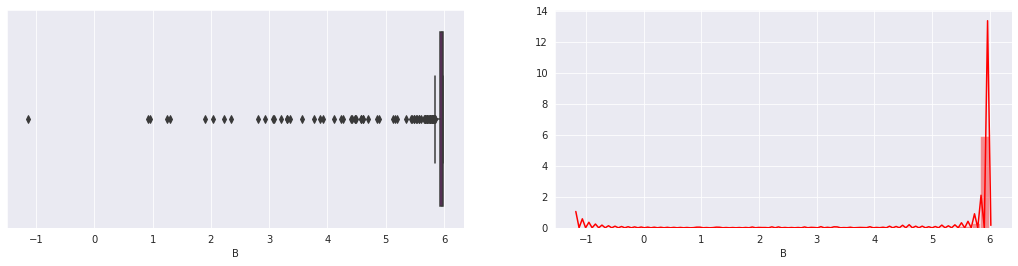

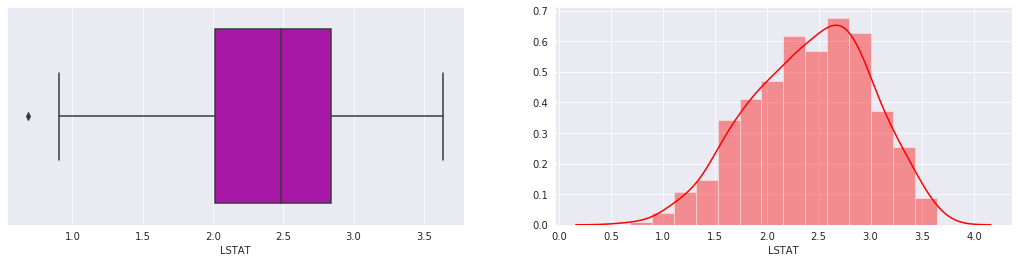

In [126]:
for i in range(len(X.columns)):
    a = X[X.columns[i]]
    f,(ax1,ax2)=plt.subplots(1,2,figsize=(18,4))
    sns.boxplot(a,ax=ax1,color='m')
    sns.distplot(a,ax=ax2,color='r')

** From the above distribution pattarn I can remove 'CHAS' & 'B' features, for better performance

In [127]:
X.drop(['CHAS','B'],1,inplace=True)

In [128]:
X.shape

(483, 9)

#### Scaling the data sets to standard Normal distribution

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X).copy()
x.shape,y.shape
x = pd.DataFrame(x,columns=X.columns)

In [130]:
del X

* Saving Scaled Datasets to csv file

In [132]:
x.to_csv('X.csv',index=False)
y.to_csv('y.csv',index=False)

In [134]:
del x,y

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing scaled CSV files

In [136]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

In [137]:
X.shape,y.shape

((483, 9), (483, 1))

In [138]:
y = y['SalePrice']

In [139]:
y.shape

(483,)

## Making Regression Model

* It is found that,if some data sets have some curveture in nature ,then linear model for perfect straight 
line would not give you the best result, in that case polynomial regression of degree two or three or more   will give better result with some regularisation factor lambda, which can regulate or shrink the coefecients of higher degrees of features that generated, otherwise we can say that by regularization factor(lambda) we can regulate overfitting or under-fitting of the model..

* I have seen from EDA that, this data sets have some curve in nature so, I will go for polynomial regression method of degree 2

* Importing Polynomial-features

In [140]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,interaction_only=False)
x = poly.fit_transform(X)
x = pd.DataFrame(x)
x.shape

(483, 55)

* So, after adding higher degrees of 2, the number of features are increased to 55 

* the equation should be like this:-
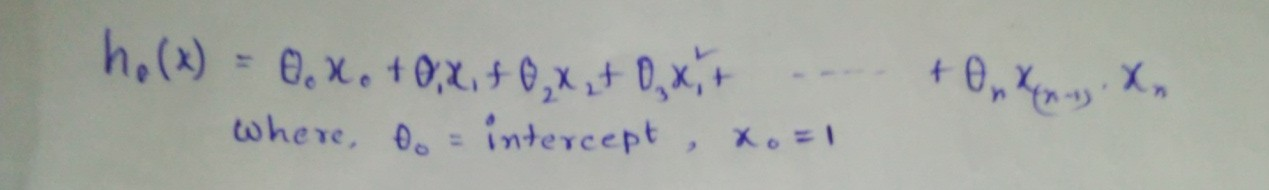

* splitting the datasets into trainsets and testsets

In [141]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
xtrain=np.array(X_train)
xtest=np.array(X_test)
ytrain=y_train
ytest=y_test
xtrain.shape,xtest.shape

((386, 55), (97, 55))

### Method-1.   Gradient Discent

* In this case I have written the equation for Gradient Discent , where the cost(MSE) of the training datasets will gradually decrease with no. of iteration

* here is my cost function without any regularisation factor:-
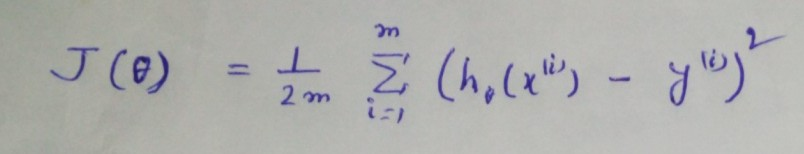

* However the cost function with regularisation factor would be like this:-
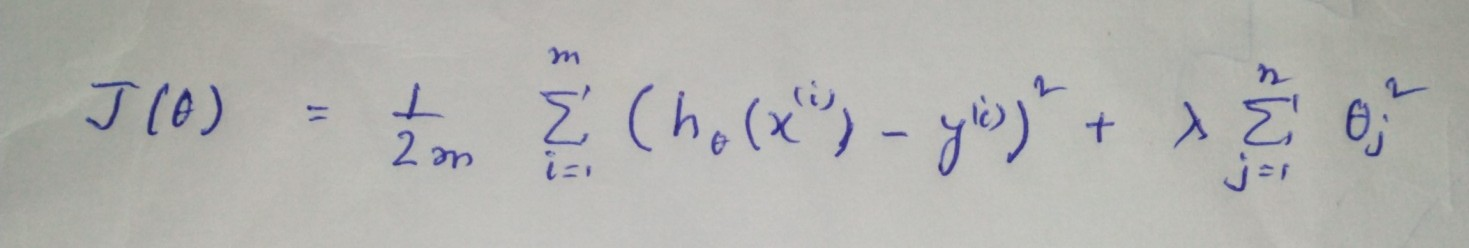

* Equation for Gradient Descent:-

* Simultaneously update theta with no. of iteration.
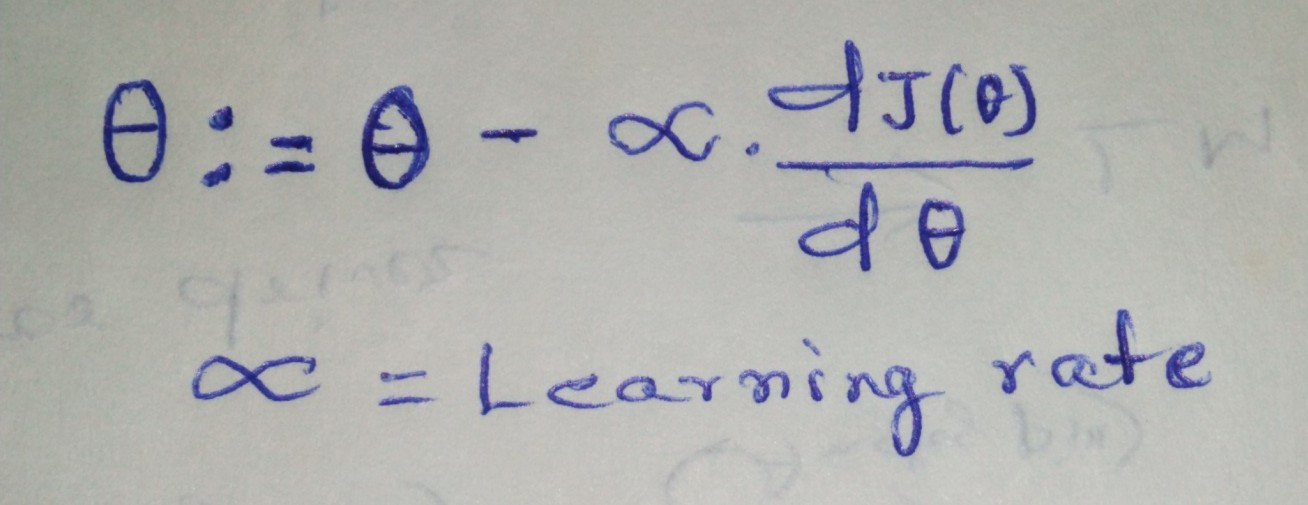


* In this equation learning rate(alpha) is given..

* I have used first equation for calculating cost to see how it works without regularisation factor.

* If you see my equation(in my code) I also added momentum with the learning rate.

In [145]:
def GradDiscent(xtrain,ytrain,xtest,ytest):    
    m=len(xtrain)
    n=len(xtrain.T)

    p = int(input('Enter no. of Iteration:'))
    alpha = float(input('Enter Learning rate(alpha):'))
    mom = float(input('Enter momentum :'))
    theta=pd.DataFrame(np.zeros([n,p]))
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,7))
    
    # here is the equation
    J=np.zeros(p+1)
    J1=np.zeros(p+1)
    for i in range(1,p+1):
        # momentum is added with learning rate alpha
        alpha = alpha*mom
        for j in range(m):
            theta[i]=theta[i-1] - (sum(np.dot(xtrain,theta[i-1]) -ytrain)/m)*alpha*xtrain[j]#calculating thetas
        J[i]=(1/(2*m))*sum((ytrain-np.dot(xtrain,theta[i]))**2) #calculating costs for train data
        J1[i]=(1/(2*m))*sum((ytest-np.dot(xtest,theta[i]))**2)  #calculating costs for test data
    Theta = pd.DataFrame(np.array(theta[p]),columns='Theta'.split(),index=x.columns)#DataFrame for final theta
    
    #plotting cost-vs-iteration
    ax1.plot(np.arange(1,p),J[2:],color='r')
    ax2.plot(np.arange(1,p),J1[2:],color='g')
    ax1.set_xlabel('No. of Iteration')
    ax1.set_ylabel('MSE, Cost for Train Data')
    ax1.set_title('Gradient descent For Train Data Set')
    ax2.set_xlabel('No. of Iteration')
    ax2.set_ylabel('MSE, Cost for Test Data')
    ax2.set_title('Gradient descent for Test Data Set')
    sns.despine(left=True)
    
    #calculating MSE and RMSE LOSS
    print('\nMSE  from GD: ',J1[p])
    print('RMSE from GD: ',np.sqrt(J1[p]))
    print('\n')
    return Theta

def Prediction(theta,xtest,y):
    thet = theta['Theta']
    PtestGD = np.dot(xtest,thet)
    p4=np.arange(int(round(y.max())))
    y4=np.arange(int(round(y.max())))
    
    #plotting prediction plot
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
     
    ax1.scatter(PtestGD,ytest,color='g')
    ax1.plot(p4,y4,color='y')
    ax1.set_xlabel('Predicted Data Set')
    ax1.set_ylabel('Original Data Set')
    ax1.set_title('Comparisign Graph')
    sns.despine(left=True)
    
    sns.distplot((PtestGD-ytest),color='red',bins=10)
    ax2.set_xlabel('VALUE')
    ax2.set_xlabel('[VALUE - PREDICTED VALUE]')
    ax2.set_title('Distribution Plot for Predicted & Test Data')
    ax2.grid()
    sns.despine(left=True)  

Enter no. of Iteration:80
Enter Learning rate(alpha):0.01
Enter momentum :0.99

MSE  from GD:  16.505754250824832
RMSE from GD:  4.06272743988873




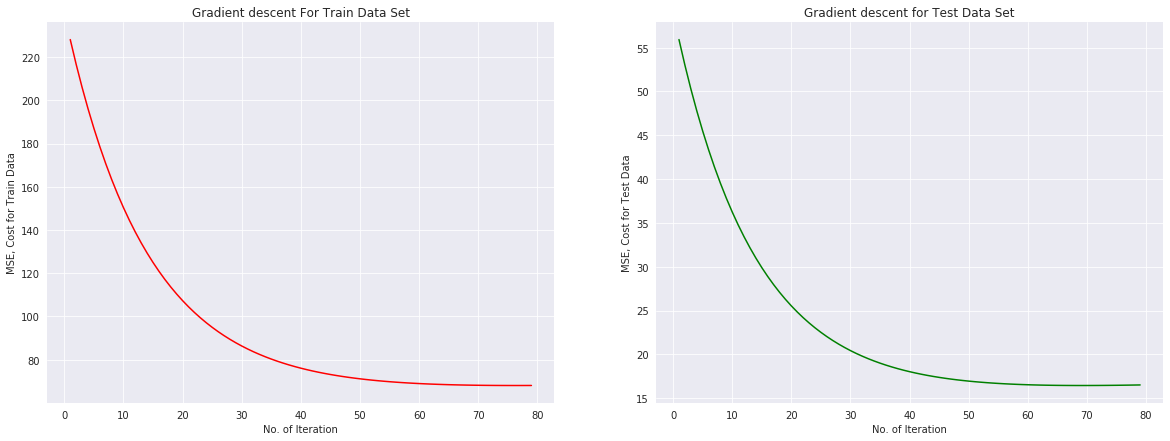

In [146]:
theta = GradDiscent(xtrain,ytrain,xtest,ytest)

* Result

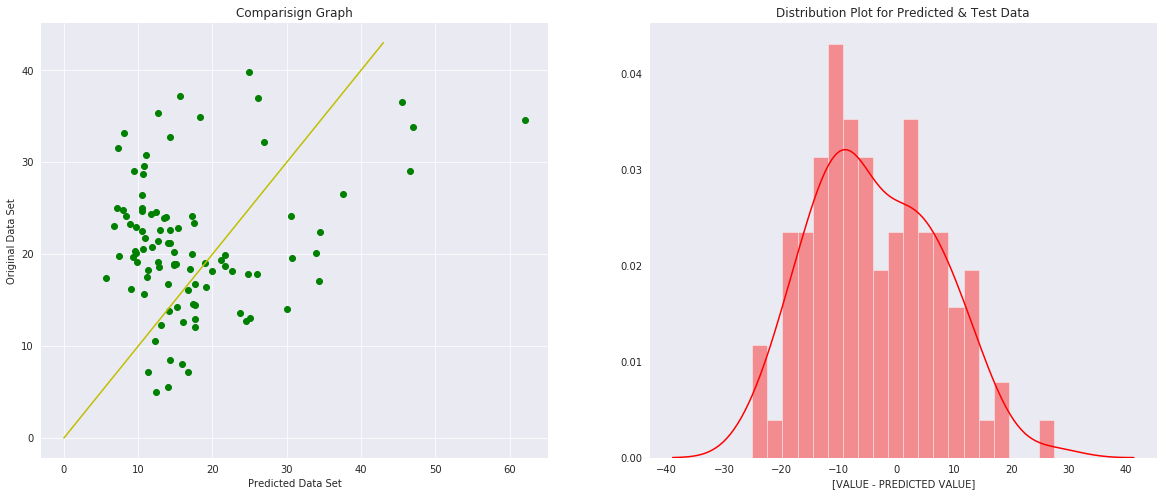

In [144]:
Prediction(theta,xtest,y)  

#### conclussion:-

* We can find that,the result is not upto the mark. 

* Only reason for that is-> I have not added regularisation factor to the cost function,However my regression equation is polynomial of degree 2, I have already taken.

* It's not the fault of the equation, cause the equation I applied here is for absolutely linear(straight-line) model but my model is polynomial of degree 2..

* So,in this case the model having an overfitting problem. However to balance it , a regularisation factor is necessary to shrink the higher degrees of cofficients but, I have not used it..

* For next method I must use the regularisation factor to balance this bias-variance problem.

### Method-2.  NORMAL EQUATION MODEL

* In a single iteration we also can calculate thetas(intercept & cofficients) with matrix multiplication as well as transpose and inverse methods of matrix.

* The equation would be like this (for absolute linear model):-

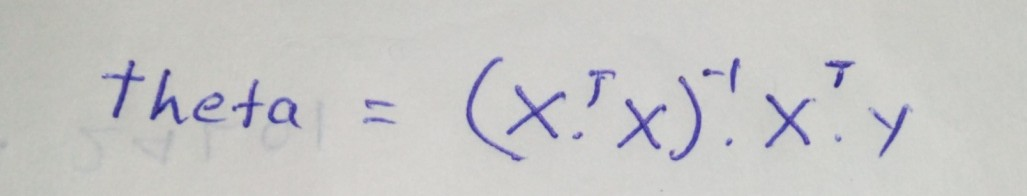 

* In the above equation regularisation factor is not given..

* As my regression model is plynomial type of degree 2 so, I have to apply some regularisation factor which will autometically shrink the coefficients of higher degree features to regularise overfitting of the model.

* The normal equation with regularisation factor is like this:-
 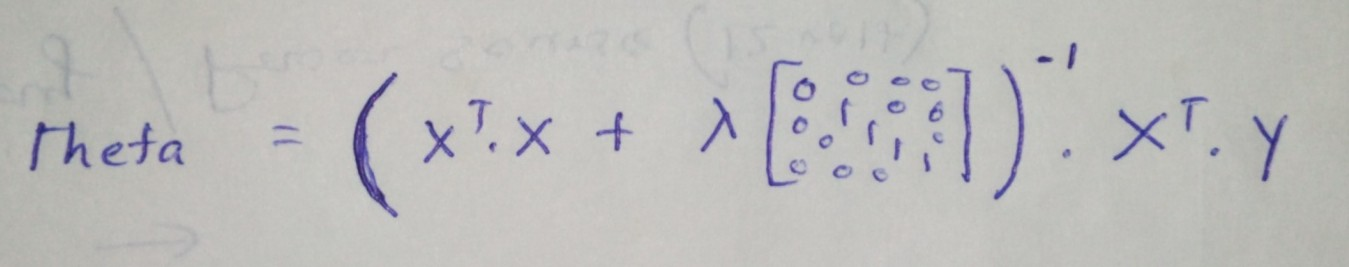   

* In most of the cases the above two equations are used to calculate directly intercept as well as cofficients of the features, which I have learnt from Prof.Andrew Ng. 

* So, I used the second equation with regularisation factor lambda.

* The first adventage of this equation is that, upto 10000 features it works very good

* The second advetage is that, it is very fast, and with single iteration it can calculate intercept as well as thetas.

In [147]:
def normalEq(xtrain,ytrain,xtest,ytest):
    m = len(xtrain)
    n = len(xtrain.T)
    lam = eval(input('Enter Regularisation Factor(Lambda): '))
    p=pd.DataFrame(np.eye(n-1).T)
    o =pd.DataFrame(np.zeros(n-1))
    #making regularisation factor
    rg = pd.concat([pd.DataFrame(np.zeros(n-1)),pd.concat([o,p],1).T],1)
    #normal equation,directly calculating thetas(intercept & cofficients)
    Theta = np.dot(np.dot(np.linalg.inv(np.dot(xtrain.T,xtrain) + np.array(rg)*lam),xtrain.T),ytrain)

    Ptest = np.dot(xtest,Theta)   # predicting for test data
    Ptrain = np.dot(xtrain,Theta) # predicting for train data
                
    from sklearn.metrics import r2_score,mean_squared_error
    mse = mean_squared_error(Ptest,ytest) 
    score = r2_score(Ptest,ytest)
    mse1 = mean_squared_error(Ptrain,ytrain)
    score1 = r2_score(Ptrain,ytrain)
    
    print('\n')
    print('*'*45)
    print('MSE,for test data     : ',mse)
    print('RMSE,for test data    : ',np.sqrt(mse))
    print('R2-score for test data: ',round(score*100,2),'%')
    print('*'*45)
    
    print('\n')
    print('*'*45)
    print('MSE,for train data     : ',mse1)
    print('RMSE,for train data    : ',np.sqrt(mse1))
    print('R2-score for train data: ',round(score1*100,2),'%')
    print('*'*45)
    
    #ploting for test data result
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

    ax1.scatter(Ptest,ytest,color='g')
    ax1.plot([0,Ptest.max()],[0,ytest.max()],color='y')
    ax1.set_xlabel('Predicted Data Set')
    ax1.set_ylabel('Original Data Set')
    ax1.set_title('Comparisign Graph')
    sns.despine(left=True)
    ax1.grid()

    sns.distplot((Ptest-ytest),color='r',bins=10)
    ax2.set_title('Distribution Plot for Predicting & Testing Data Set')
    ax2.grid()
    sns.despine(left=True)
    
    #ploting for train data result
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

    ax1.scatter(Ptrain,ytrain,color='g')
    ax1.plot([0,Ptrain.max()],[0,ytrain.max()],color='y')
    ax1.set_xlabel('Predicted Data Set')
    ax1.set_ylabel('Original Data Set')
    ax1.set_title('Comparisign Graph')
    sns.despine(left=True)
    ax1.grid()

    sns.distplot((Ptrain-ytrain),color='r',bins=10)
    ax2.set_title('Distribution Plot for Predicting & Traing Data Set')
    ax2.grid()
    sns.despine(left=True)
    return pd.DataFrame(Theta).T

Enter Regularisation Factor(Lambda): 0.004


*********************************************
MSE,for test data     :  5.578137194780496
RMSE,for test data    :  2.3618080351248905
R2-score for test data:  87.49 %
*********************************************


*********************************************
MSE,for train data     :  6.40120110573285
RMSE,for train data    :  2.5300595063620244
R2-score for train data:  86.25 %
*********************************************


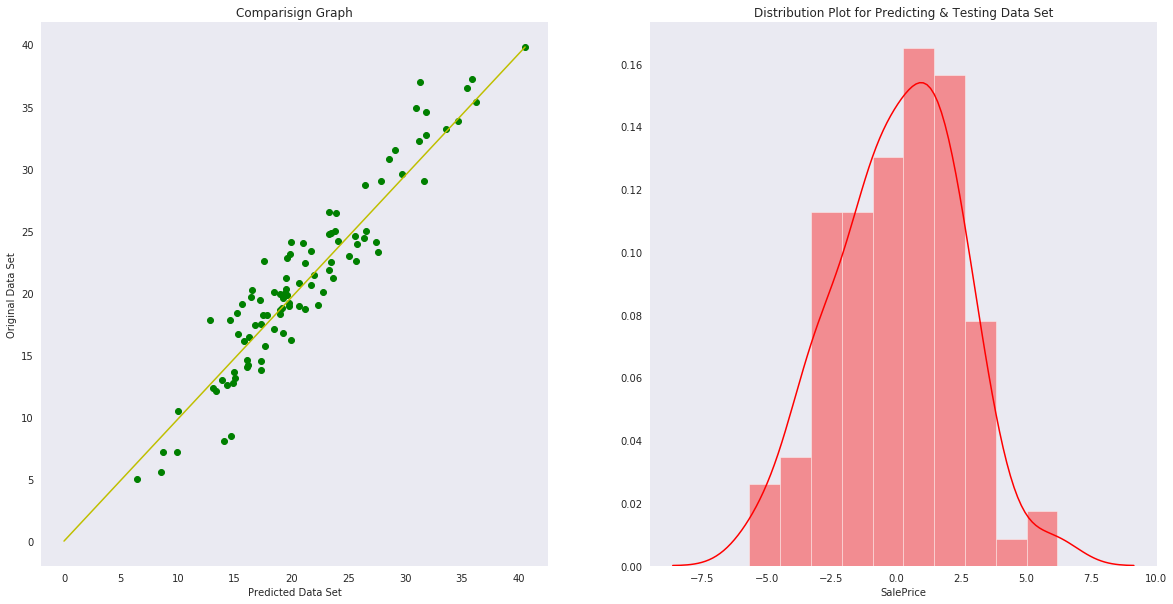

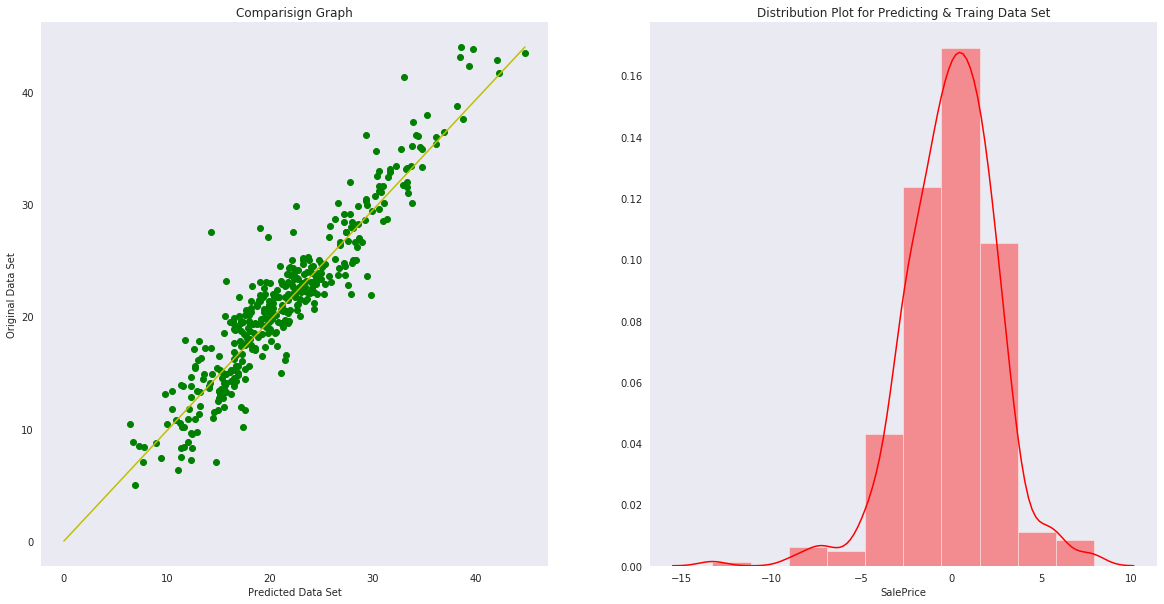

In [148]:
theta = normalEq(xtrain,ytrain,xtest,ytest)

In [149]:
print('Values of Intercept(col=0) and coefficients :-') 
theta

Values of Intercept(col=0) and coefficients :-


0         1        2         3         4         5         6   \
0  22.089556 -0.582908 -0.44595  0.387541  0.004026  3.176394 -1.326617   

         7         8         9   ...        45        46        47        48  \
0 -0.610869 -1.003942 -2.161341  ... -0.413723  0.180665 -0.177654 -0.849856   

         49        50        51        52        53       54  
0  0.011199  2.010688 -1.331451 -0.214186  0.224188  0.29353  

[1 rows x 55 columns]

### Conclussion:-

* So, by adding regularisation factor I got very good result with only single iteration..

* I also get the values of intercept & cofficients for each of the features..

### Method-3. SKlearn Model

In [150]:
def SKLEARN(xtrain,ytrain,xtest,ytest):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score,mean_squared_error
    reg = LinearRegression(normalize=True)
    reg.fit(xtrain,ytrain)

    #prediction result and plot for test data
    pred = reg.predict(xtest)
    score = r2_score(pred,ytest)
    mse = mean_squared_error(pred,ytest)
    rmse = np.sqrt(mse)
    print('*'*45)
    print("R2-Score for test data:",round(score*100,2),"%")
    print("MSE for test data     :",round(mse,4))
    print("RMSE for test data    :",round(rmse,4))
    print('*'*45)

    #prediction result and plot for train data
    preda = reg.predict(xtrain)
    score1 = r2_score(preda,ytrain)
    mse1 = mean_squared_error(preda,ytrain)
    rmse1 = np.sqrt(mse)
    print("nR2-Score for train data:",round(score1*100,2),"%")
    print("MSE for train data     :",round(mse1,4))
    print("RMSE for train data    :",round(rmse1,4))
    print('*'*45)

    #ploting for test data
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
    ax1.scatter(pred,ytest,color='g')
    ax1.plot([0,ytest.max()],[0,pred.max()],color='y')
    ax1.set_xlabel('Predicted Data Set')
    ax1.set_ylabel('Test Data Set')
    ax1.set_title('Comparisign Graph')
    sns.despine(left=True)

    sns.distplot((pred-ytest),color='red',bins=10)
    ax2.set_xlabel('[PREDICTED PRICE - PRICE]')
    ax2.set_title('Distribution Plot for Predicted & Test Data')
    ax2.grid()
    sns.despine(left=True) 

    #ploting for train data
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))     
    ax1.scatter(preda,ytrain,color='g')
    ax1.plot([0,ytrain.max()],[0,preda.max()],color='y')
    ax1.set_xlabel('Predicted Data Set')
    ax1.set_ylabel('Original Data Set')
    ax1.set_title('Comparisign Graph')
    sns.despine(left=True)

    sns.distplot((preda-ytrain),color='red',bins=10)
    ax2.set_xlabel('[PREDICTED PRICE - PRICE]')
    ax2.set_title('Distribution Plot for Predicted & Train Data')
    ax2.grid()
    sns.despine(left=True)  

*********************************************
R2-Score for test data: 87.49 %
MSE for test data     : 5.5787
RMSE for test data    : 2.3619
*********************************************
nR2-Score for train data: 86.25 %
MSE for train data     : 6.4012
RMSE for train data    : 2.3619
*********************************************


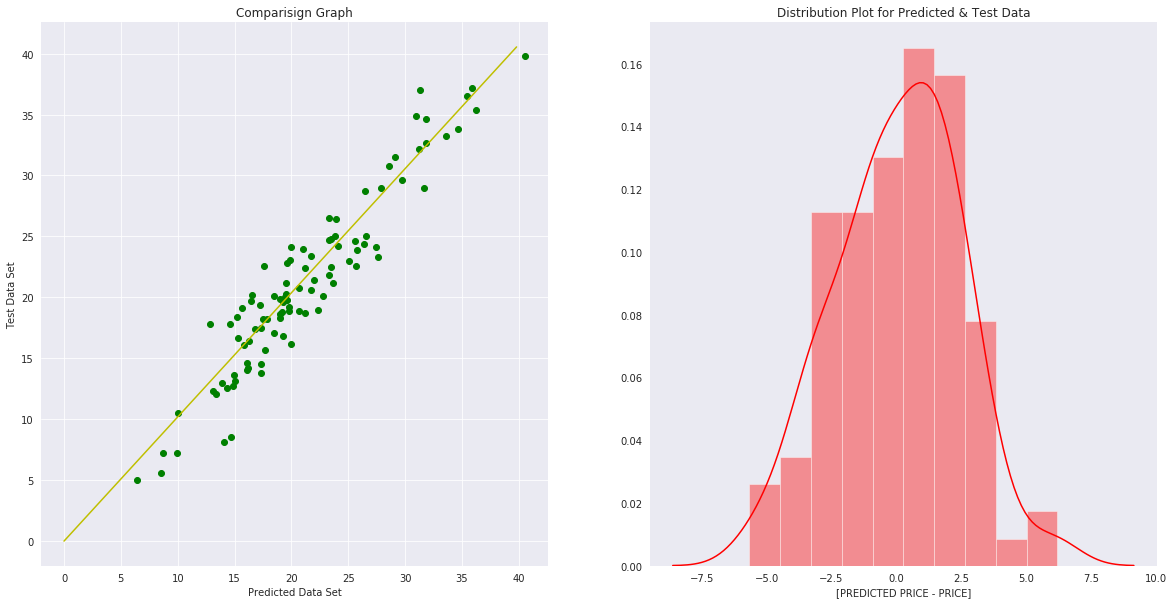

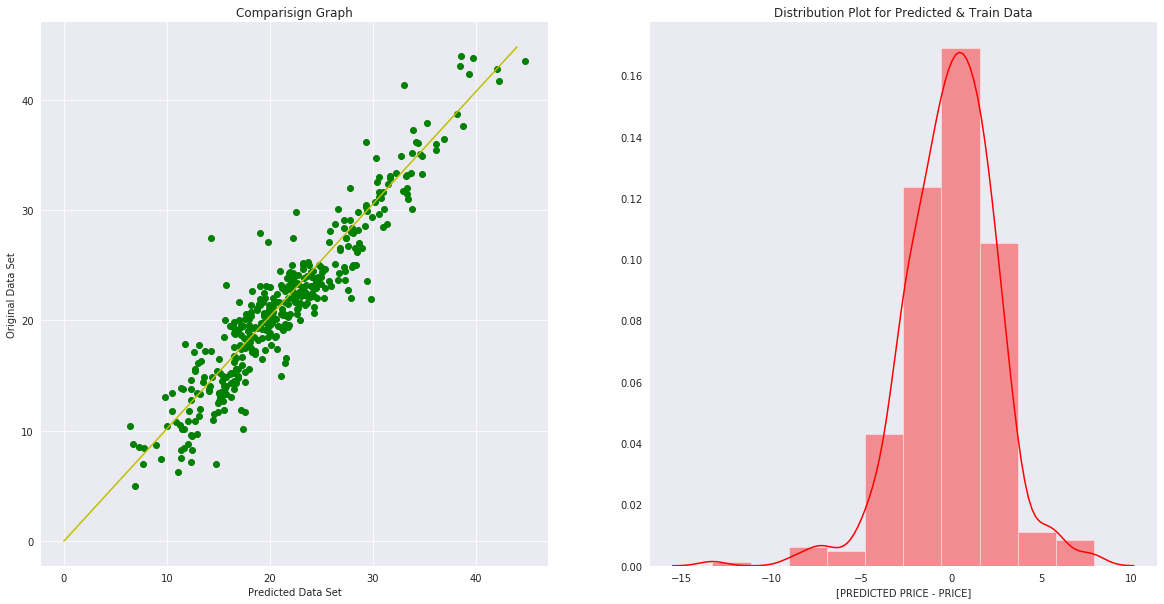

In [151]:
SKLEARN(xtrain,ytrain,xtest,ytest)

#### Conclussion:-

* Both Noarmal Equation Model with regularisation factor and Sklearn model giving same result.

* So, I can save any one out of the two model for further use(prediction)

#### I am saving my normal equation model as csv file, that is nothing but intercept & coifficients(theta)

In [153]:
theta.to_csv('Theta.csv',index=False)

-------------------------------------------------------------Thanks------------------------------------------------